### SVM

In [1]:
load('mnist.Rdata')

In [2]:
objects()

[1] "x_test"  "x_train" "y_test"  "y_train"

In [2]:
library(tensorflow)
library(keras)
#install_tensorflow(version='1.12')
#install_keras()

Warning message:
"package 'tensorflow' was built under R version 3.6.3"

In [4]:
dim(x_train)

[1] 60000    28    28

In [5]:
dim(x_test)

[1] 10000    28    28

In [6]:
head(y_train)

[1] 5 0 4 1 9 2

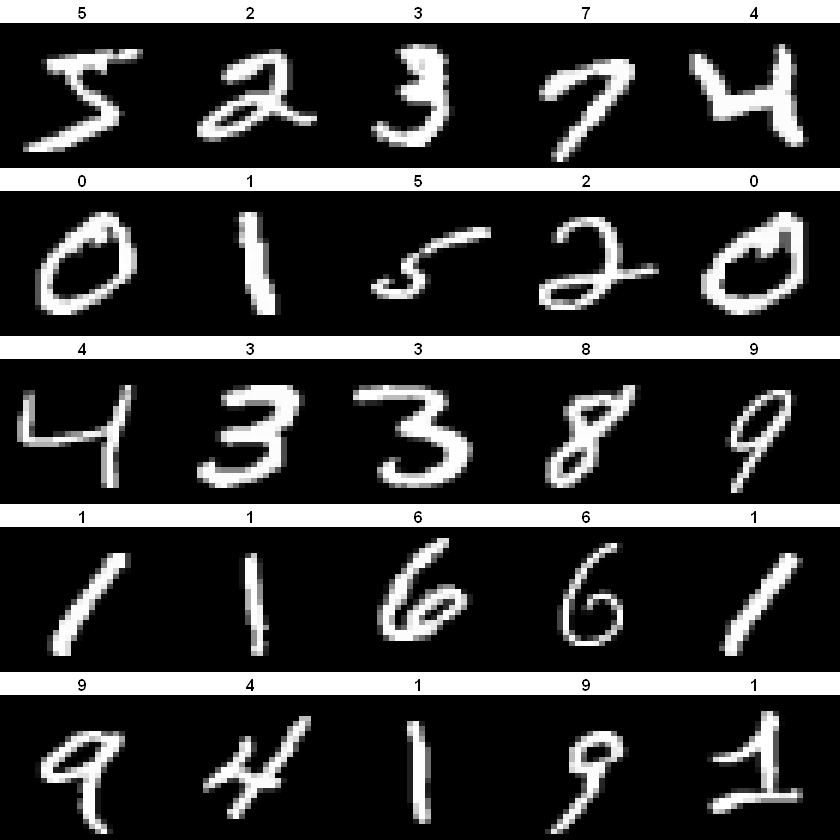

In [7]:
par(mfcol=c(5,5))
par(mar=c(0, 0, 1.5, 0), xaxs='i', yaxs='i')
for (i in 1:25) {
img <- x_train[i, , ]
img <- t(apply(img, 2, rev))
image(1:28, 1:28, img, col = gray((0:255)/255), xaxt = 'n', yaxt = 'n',
     main = y_train[i])
}

### Preprocessing the data

In [3]:
x_train = x_train/255
x_test = x_test/255

In [4]:
x_train.1 <- matrix(x_train, dim(x_train)[1], prod(dim(x_train)[2:3]))
x_test.1 <- matrix(x_test, dim(x_test)[1], prod(dim(x_test)[2:3]))

In [6]:
y_train = as.factor(y_train)
y_test = as.factor(y_test)

In [7]:
train_data = data.frame(y_test[1:1000], x_test.1[1:1000,])
colnames(train_data)[1] = "labels"

In [8]:
test_data = data.frame(y_train, x_train.1)
colnames(test_data)[1] = "labels"

### Tune SVM

In [12]:
library(e1071)

Warning message:
"package 'e1071' was built under R version 3.6.2"

In [18]:
tune.out =tune(svm, labels~., data=train_data, ranges=list(cost=c(0.1,1), kernel=c("linear", "radial"),
                                                           degree=c(3,6), gamma = c(0.001,0.00001)))
#summary(tune.out)

Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
"Variable(s) 'X1' and 'X2' and 'X3' and 'X4' and 'X5' and 'X6' and 'X7' and 'X8' and 'X9' and 'X12' and 'X13' and 'X14' and 'X15' and 'X16' and 'X17' and 'X18' and 'X19' and 'X20' and 'X21' and 'X22' and 'X23' and 'X24' and 'X25' and 'X26' and 'X27' and 'X28' and 'X29' and 'X30' and 'X31' and 'X32' and 'X33' and 'X34' and 'X35' and 'X36' and 'X40' and 'X41' and 'X42' and 'X43' and 'X44' and 'X45' and 'X46' and 'X47' and 'X48' and 'X49' and 'X50' and 'X51' and 'X52' and 'X53' and 'X54' and 'X55' and 'X56' and 'X57' and 'X58' and 'X59' and 'X60' and 'X61' and 'X62' and 'X70' and 'X71' and 'X72' and 'X73' and 'X74' and 'X75' and 'X76' and 'X77' and 'X78' and 'X79' and 'X80' and 'X81' and 'X82' and 'X83' and 'X84' and 'X85' and 'X86' and 'X87' and 'X88' and 'X107' and 'X108' and 'X109' and 'X110' and 'X111' and 'X112' and 'X113' and 'X114' and 'X115' and 'X116' and 'X139' and 'X140' and 'X141' and 'X142' and '

"Variable(s) 'X1' and 'X2' and 'X3' and 'X4' and 'X5' and 'X6' and 'X7' and 'X8' and 'X9' and 'X12' and 'X13' and 'X14' and 'X15' and 'X16' and 'X17' and 'X18' and 'X19' and 'X20' and 'X21' and 'X22' and 'X23' and 'X24' and 'X25' and 'X26' and 'X27' and 'X28' and 'X29' and 'X30' and 'X31' and 'X32' and 'X33' and 'X34' and 'X35' and 'X36' and 'X40' and 'X41' and 'X42' and 'X43' and 'X44' and 'X45' and 'X46' and 'X47' and 'X48' and 'X49' and 'X50' and 'X51' and 'X52' and 'X53' and 'X54' and 'X55' and 'X56' and 'X57' and 'X58' and 'X59' and 'X60' and 'X61' and 'X62' and 'X70' and 'X71' and 'X72' and 'X73' and 'X74' and 'X75' and 'X76' and 'X80' and 'X81' and 'X82' and 'X83' and 'X84' and 'X85' and 'X86' and 'X87' and 'X88' and 'X89' and 'X108' and 'X109' and 'X110' and 'X111' and 'X112' and 'X113' and 'X114' and 'X115' and 'X116' and 'X139' and 'X140' and 'X141' and 'X142' and 'X143' and 'X167' and 'X168' and 'X169' and 'X170' and 'X171' and 'X196' and 'X197' and 'X198' and 'X199' and 'X2

"Variable(s) 'X1' and 'X2' and 'X3' and 'X4' and 'X5' and 'X6' and 'X7' and 'X8' and 'X9' and 'X12' and 'X13' and 'X14' and 'X15' and 'X16' and 'X17' and 'X18' and 'X19' and 'X20' and 'X21' and 'X22' and 'X23' and 'X24' and 'X25' and 'X26' and 'X27' and 'X28' and 'X29' and 'X30' and 'X31' and 'X32' and 'X33' and 'X34' and 'X35' and 'X36' and 'X40' and 'X41' and 'X42' and 'X43' and 'X44' and 'X45' and 'X46' and 'X47' and 'X48' and 'X49' and 'X50' and 'X51' and 'X52' and 'X53' and 'X54' and 'X55' and 'X56' and 'X57' and 'X58' and 'X59' and 'X60' and 'X61' and 'X62' and 'X70' and 'X71' and 'X72' and 'X73' and 'X74' and 'X75' and 'X76' and 'X80' and 'X81' and 'X82' and 'X83' and 'X84' and 'X85' and 'X86' and 'X87' and 'X88' and 'X108' and 'X109' and 'X110' and 'X111' and 'X112' and 'X113' and 'X114' and 'X115' and 'X116' and 'X139' and 'X140' and 'X141' and 'X142' and 'X143' and 'X167' and 'X168' and 'X169' and 'X170' and 'X171' and 'X196' and 'X197' and 'X198' and 'X199' and 'X224' and 'X

"Variable(s) 'X1' and 'X2' and 'X3' and 'X4' and 'X5' and 'X6' and 'X7' and 'X8' and 'X9' and 'X12' and 'X13' and 'X14' and 'X15' and 'X16' and 'X17' and 'X18' and 'X19' and 'X20' and 'X21' and 'X22' and 'X23' and 'X24' and 'X25' and 'X26' and 'X27' and 'X28' and 'X29' and 'X30' and 'X31' and 'X32' and 'X33' and 'X34' and 'X35' and 'X36' and 'X40' and 'X41' and 'X42' and 'X43' and 'X44' and 'X45' and 'X46' and 'X47' and 'X48' and 'X49' and 'X50' and 'X51' and 'X52' and 'X53' and 'X54' and 'X55' and 'X56' and 'X57' and 'X58' and 'X59' and 'X60' and 'X61' and 'X62' and 'X70' and 'X71' and 'X72' and 'X73' and 'X74' and 'X75' and 'X76' and 'X80' and 'X81' and 'X82' and 'X83' and 'X84' and 'X85' and 'X86' and 'X87' and 'X88' and 'X108' and 'X109' and 'X110' and 'X111' and 'X112' and 'X113' and 'X114' and 'X115' and 'X116' and 'X139' and 'X140' and 'X141' and 'X142' and 'X143' and 'X167' and 'X168' and 'X169' and 'X170' and 'X171' and 'X196' and 'X197' and 'X198' and 'X199' and 'X224' and 'X

"Variable(s) 'X1' and 'X2' and 'X3' and 'X4' and 'X5' and 'X6' and 'X7' and 'X8' and 'X9' and 'X12' and 'X13' and 'X14' and 'X15' and 'X16' and 'X17' and 'X18' and 'X19' and 'X20' and 'X21' and 'X22' and 'X23' and 'X24' and 'X25' and 'X26' and 'X27' and 'X28' and 'X29' and 'X30' and 'X31' and 'X32' and 'X33' and 'X34' and 'X35' and 'X36' and 'X40' and 'X41' and 'X42' and 'X43' and 'X44' and 'X45' and 'X46' and 'X47' and 'X48' and 'X49' and 'X50' and 'X51' and 'X52' and 'X53' and 'X54' and 'X55' and 'X56' and 'X57' and 'X58' and 'X59' and 'X60' and 'X61' and 'X62' and 'X70' and 'X71' and 'X72' and 'X73' and 'X74' and 'X75' and 'X76' and 'X80' and 'X81' and 'X82' and 'X83' and 'X84' and 'X85' and 'X86' and 'X87' and 'X88' and 'X108' and 'X109' and 'X110' and 'X111' and 'X112' and 'X113' and 'X114' and 'X115' and 'X116' and 'X139' and 'X140' and 'X141' and 'X142' and 'X143' and 'X167' and 'X168' and 'X169' and 'X170' and 'X171' and 'X195' and 'X196' and 'X197' and 'X198' and 'X199' and 'X

"Variable(s) 'X1' and 'X2' and 'X3' and 'X4' and 'X5' and 'X6' and 'X7' and 'X8' and 'X9' and 'X12' and 'X13' and 'X14' and 'X15' and 'X16' and 'X17' and 'X18' and 'X19' and 'X20' and 'X21' and 'X22' and 'X23' and 'X24' and 'X25' and 'X26' and 'X27' and 'X28' and 'X29' and 'X30' and 'X31' and 'X32' and 'X33' and 'X34' and 'X35' and 'X36' and 'X40' and 'X41' and 'X42' and 'X43' and 'X44' and 'X45' and 'X46' and 'X47' and 'X48' and 'X49' and 'X50' and 'X51' and 'X52' and 'X53' and 'X54' and 'X55' and 'X56' and 'X57' and 'X58' and 'X59' and 'X60' and 'X61' and 'X62' and 'X70' and 'X71' and 'X72' and 'X73' and 'X74' and 'X75' and 'X76' and 'X77' and 'X78' and 'X79' and 'X80' and 'X81' and 'X82' and 'X83' and 'X84' and 'X85' and 'X86' and 'X87' and 'X88' and 'X107' and 'X108' and 'X109' and 'X110' and 'X111' and 'X112' and 'X113' and 'X114' and 'X115' and 'X116' and 'X139' and 'X140' and 'X141' and 'X142' and 'X143' and 'X167' and 'X168' and 'X169' and 'X170' and 'X171' and 'X196' and 'X197

"Variable(s) 'X1' and 'X2' and 'X3' and 'X4' and 'X5' and 'X6' and 'X7' and 'X8' and 'X9' and 'X12' and 'X13' and 'X14' and 'X15' and 'X16' and 'X17' and 'X18' and 'X19' and 'X20' and 'X21' and 'X22' and 'X23' and 'X24' and 'X25' and 'X26' and 'X27' and 'X28' and 'X29' and 'X30' and 'X31' and 'X32' and 'X33' and 'X34' and 'X35' and 'X36' and 'X40' and 'X41' and 'X42' and 'X43' and 'X44' and 'X45' and 'X46' and 'X47' and 'X48' and 'X49' and 'X50' and 'X51' and 'X52' and 'X53' and 'X54' and 'X55' and 'X56' and 'X57' and 'X58' and 'X59' and 'X60' and 'X61' and 'X62' and 'X70' and 'X71' and 'X72' and 'X73' and 'X74' and 'X75' and 'X76' and 'X80' and 'X81' and 'X82' and 'X83' and 'X84' and 'X85' and 'X86' and 'X87' and 'X88' and 'X89' and 'X108' and 'X109' and 'X110' and 'X111' and 'X112' and 'X113' and 'X114' and 'X115' and 'X116' and 'X139' and 'X140' and 'X141' and 'X142' and 'X143' and 'X167' and 'X168' and 'X169' and 'X170' and 'X171' and 'X196' and 'X197' and 'X198' and 'X199' and 'X2

"Variable(s) 'X1' and 'X2' and 'X3' and 'X4' and 'X5' and 'X6' and 'X7' and 'X8' and 'X9' and 'X12' and 'X13' and 'X14' and 'X15' and 'X16' and 'X17' and 'X18' and 'X19' and 'X20' and 'X21' and 'X22' and 'X23' and 'X24' and 'X25' and 'X26' and 'X27' and 'X28' and 'X29' and 'X30' and 'X31' and 'X32' and 'X33' and 'X34' and 'X35' and 'X36' and 'X40' and 'X41' and 'X42' and 'X43' and 'X44' and 'X45' and 'X46' and 'X47' and 'X48' and 'X49' and 'X50' and 'X51' and 'X52' and 'X53' and 'X54' and 'X55' and 'X56' and 'X57' and 'X58' and 'X59' and 'X60' and 'X61' and 'X62' and 'X70' and 'X71' and 'X72' and 'X73' and 'X74' and 'X75' and 'X76' and 'X80' and 'X81' and 'X82' and 'X83' and 'X84' and 'X85' and 'X86' and 'X87' and 'X88' and 'X108' and 'X109' and 'X110' and 'X111' and 'X112' and 'X113' and 'X114' and 'X115' and 'X116' and 'X139' and 'X140' and 'X141' and 'X142' and 'X143' and 'X167' and 'X168' and 'X169' and 'X170' and 'X171' and 'X196' and 'X197' and 'X198' and 'X199' and 'X224' and 'X

"Variable(s) 'X1' and 'X2' and 'X3' and 'X4' and 'X5' and 'X6' and 'X7' and 'X8' and 'X9' and 'X12' and 'X13' and 'X14' and 'X15' and 'X16' and 'X17' and 'X18' and 'X19' and 'X20' and 'X21' and 'X22' and 'X23' and 'X24' and 'X25' and 'X26' and 'X27' and 'X28' and 'X29' and 'X30' and 'X31' and 'X32' and 'X33' and 'X34' and 'X35' and 'X36' and 'X40' and 'X41' and 'X42' and 'X43' and 'X44' and 'X45' and 'X46' and 'X47' and 'X48' and 'X49' and 'X50' and 'X51' and 'X52' and 'X53' and 'X54' and 'X55' and 'X56' and 'X57' and 'X58' and 'X59' and 'X60' and 'X61' and 'X62' and 'X70' and 'X71' and 'X72' and 'X73' and 'X74' and 'X75' and 'X76' and 'X80' and 'X81' and 'X82' and 'X83' and 'X84' and 'X85' and 'X86' and 'X87' and 'X88' and 'X108' and 'X109' and 'X110' and 'X111' and 'X112' and 'X113' and 'X114' and 'X115' and 'X116' and 'X139' and 'X140' and 'X141' and 'X142' and 'X143' and 'X167' and 'X168' and 'X169' and 'X170' and 'X171' and 'X196' and 'X197' and 'X198' and 'X199' and 'X224' and 'X

"Variable(s) 'X1' and 'X2' and 'X3' and 'X4' and 'X5' and 'X6' and 'X7' and 'X8' and 'X9' and 'X12' and 'X13' and 'X14' and 'X15' and 'X16' and 'X17' and 'X18' and 'X19' and 'X20' and 'X21' and 'X22' and 'X23' and 'X24' and 'X25' and 'X26' and 'X27' and 'X28' and 'X29' and 'X30' and 'X31' and 'X32' and 'X33' and 'X34' and 'X35' and 'X36' and 'X40' and 'X41' and 'X42' and 'X43' and 'X44' and 'X45' and 'X46' and 'X47' and 'X48' and 'X49' and 'X50' and 'X51' and 'X52' and 'X53' and 'X54' and 'X55' and 'X56' and 'X57' and 'X58' and 'X59' and 'X60' and 'X61' and 'X62' and 'X70' and 'X71' and 'X72' and 'X73' and 'X74' and 'X75' and 'X76' and 'X80' and 'X81' and 'X82' and 'X83' and 'X84' and 'X85' and 'X86' and 'X87' and 'X88' and 'X108' and 'X109' and 'X110' and 'X111' and 'X112' and 'X113' and 'X114' and 'X115' and 'X116' and 'X139' and 'X140' and 'X141' and 'X142' and 'X143' and 'X167' and 'X168' and 'X169' and 'X170' and 'X171' and 'X195' and 'X196' and 'X197' and 'X198' and 'X199' and 'X

"Variable(s) 'X1' and 'X2' and 'X3' and 'X4' and 'X5' and 'X6' and 'X7' and 'X8' and 'X9' and 'X12' and 'X13' and 'X14' and 'X15' and 'X16' and 'X17' and 'X18' and 'X19' and 'X20' and 'X21' and 'X22' and 'X23' and 'X24' and 'X25' and 'X26' and 'X27' and 'X28' and 'X29' and 'X30' and 'X31' and 'X32' and 'X33' and 'X34' and 'X35' and 'X36' and 'X40' and 'X41' and 'X42' and 'X43' and 'X44' and 'X45' and 'X46' and 'X47' and 'X48' and 'X49' and 'X50' and 'X51' and 'X52' and 'X53' and 'X54' and 'X55' and 'X56' and 'X57' and 'X58' and 'X59' and 'X60' and 'X61' and 'X62' and 'X70' and 'X71' and 'X72' and 'X73' and 'X74' and 'X75' and 'X76' and 'X77' and 'X78' and 'X79' and 'X80' and 'X81' and 'X82' and 'X83' and 'X84' and 'X85' and 'X86' and 'X87' and 'X88' and 'X107' and 'X108' and 'X109' and 'X110' and 'X111' and 'X112' and 'X113' and 'X114' and 'X115' and 'X116' and 'X139' and 'X140' and 'X141' and 'X142' and 'X143' and 'X167' and 'X168' and 'X169' and 'X170' and 'X171' and 'X196' and 'X197

"Variable(s) 'X1' and 'X2' and 'X3' and 'X4' and 'X5' and 'X6' and 'X7' and 'X8' and 'X9' and 'X12' and 'X13' and 'X14' and 'X15' and 'X16' and 'X17' and 'X18' and 'X19' and 'X20' and 'X21' and 'X22' and 'X23' and 'X24' and 'X25' and 'X26' and 'X27' and 'X28' and 'X29' and 'X30' and 'X31' and 'X32' and 'X33' and 'X34' and 'X35' and 'X36' and 'X40' and 'X41' and 'X42' and 'X43' and 'X44' and 'X45' and 'X46' and 'X47' and 'X48' and 'X49' and 'X50' and 'X51' and 'X52' and 'X53' and 'X54' and 'X55' and 'X56' and 'X57' and 'X58' and 'X59' and 'X60' and 'X61' and 'X62' and 'X70' and 'X71' and 'X72' and 'X73' and 'X74' and 'X75' and 'X76' and 'X80' and 'X81' and 'X82' and 'X83' and 'X84' and 'X85' and 'X86' and 'X87' and 'X88' and 'X89' and 'X108' and 'X109' and 'X110' and 'X111' and 'X112' and 'X113' and 'X114' and 'X115' and 'X116' and 'X139' and 'X140' and 'X141' and 'X142' and 'X143' and 'X167' and 'X168' and 'X169' and 'X170' and 'X171' and 'X196' and 'X197' and 'X198' and 'X199' and 'X2

"Variable(s) 'X1' and 'X2' and 'X3' and 'X4' and 'X5' and 'X6' and 'X7' and 'X8' and 'X9' and 'X12' and 'X13' and 'X14' and 'X15' and 'X16' and 'X17' and 'X18' and 'X19' and 'X20' and 'X21' and 'X22' and 'X23' and 'X24' and 'X25' and 'X26' and 'X27' and 'X28' and 'X29' and 'X30' and 'X31' and 'X32' and 'X33' and 'X34' and 'X35' and 'X36' and 'X40' and 'X41' and 'X42' and 'X43' and 'X44' and 'X45' and 'X46' and 'X47' and 'X48' and 'X49' and 'X50' and 'X51' and 'X52' and 'X53' and 'X54' and 'X55' and 'X56' and 'X57' and 'X58' and 'X59' and 'X60' and 'X61' and 'X62' and 'X70' and 'X71' and 'X72' and 'X73' and 'X74' and 'X75' and 'X76' and 'X80' and 'X81' and 'X82' and 'X83' and 'X84' and 'X85' and 'X86' and 'X87' and 'X88' and 'X108' and 'X109' and 'X110' and 'X111' and 'X112' and 'X113' and 'X114' and 'X115' and 'X116' and 'X139' and 'X140' and 'X141' and 'X142' and 'X143' and 'X167' and 'X168' and 'X169' and 'X170' and 'X171' and 'X196' and 'X197' and 'X198' and 'X199' and 'X224' and 'X

"Variable(s) 'X1' and 'X2' and 'X3' and 'X4' and 'X5' and 'X6' and 'X7' and 'X8' and 'X9' and 'X12' and 'X13' and 'X14' and 'X15' and 'X16' and 'X17' and 'X18' and 'X19' and 'X20' and 'X21' and 'X22' and 'X23' and 'X24' and 'X25' and 'X26' and 'X27' and 'X28' and 'X29' and 'X30' and 'X31' and 'X32' and 'X33' and 'X34' and 'X35' and 'X36' and 'X40' and 'X41' and 'X42' and 'X43' and 'X44' and 'X45' and 'X46' and 'X47' and 'X48' and 'X49' and 'X50' and 'X51' and 'X52' and 'X53' and 'X54' and 'X55' and 'X56' and 'X57' and 'X58' and 'X59' and 'X60' and 'X61' and 'X62' and 'X70' and 'X71' and 'X72' and 'X73' and 'X74' and 'X75' and 'X76' and 'X80' and 'X81' and 'X82' and 'X83' and 'X84' and 'X85' and 'X86' and 'X87' and 'X88' and 'X108' and 'X109' and 'X110' and 'X111' and 'X112' and 'X113' and 'X114' and 'X115' and 'X116' and 'X139' and 'X140' and 'X141' and 'X142' and 'X143' and 'X167' and 'X168' and 'X169' and 'X170' and 'X171' and 'X196' and 'X197' and 'X198' and 'X199' and 'X224' and 'X

"Variable(s) 'X1' and 'X2' and 'X3' and 'X4' and 'X5' and 'X6' and 'X7' and 'X8' and 'X9' and 'X12' and 'X13' and 'X14' and 'X15' and 'X16' and 'X17' and 'X18' and 'X19' and 'X20' and 'X21' and 'X22' and 'X23' and 'X24' and 'X25' and 'X26' and 'X27' and 'X28' and 'X29' and 'X30' and 'X31' and 'X32' and 'X33' and 'X34' and 'X35' and 'X36' and 'X40' and 'X41' and 'X42' and 'X43' and 'X44' and 'X45' and 'X46' and 'X47' and 'X48' and 'X49' and 'X50' and 'X51' and 'X52' and 'X53' and 'X54' and 'X55' and 'X56' and 'X57' and 'X58' and 'X59' and 'X60' and 'X61' and 'X62' and 'X70' and 'X71' and 'X72' and 'X73' and 'X74' and 'X75' and 'X76' and 'X80' and 'X81' and 'X82' and 'X83' and 'X84' and 'X85' and 'X86' and 'X87' and 'X88' and 'X108' and 'X109' and 'X110' and 'X111' and 'X112' and 'X113' and 'X114' and 'X115' and 'X116' and 'X139' and 'X140' and 'X141' and 'X142' and 'X143' and 'X167' and 'X168' and 'X169' and 'X170' and 'X171' and 'X195' and 'X196' and 'X197' and 'X198' and 'X199' and 'X

"Variable(s) 'X1' and 'X2' and 'X3' and 'X4' and 'X5' and 'X6' and 'X7' and 'X8' and 'X9' and 'X12' and 'X13' and 'X14' and 'X15' and 'X16' and 'X17' and 'X18' and 'X19' and 'X20' and 'X21' and 'X22' and 'X23' and 'X24' and 'X25' and 'X26' and 'X27' and 'X28' and 'X29' and 'X30' and 'X31' and 'X32' and 'X33' and 'X34' and 'X35' and 'X36' and 'X40' and 'X41' and 'X42' and 'X43' and 'X44' and 'X45' and 'X46' and 'X47' and 'X48' and 'X49' and 'X50' and 'X51' and 'X52' and 'X53' and 'X54' and 'X55' and 'X56' and 'X57' and 'X58' and 'X59' and 'X60' and 'X61' and 'X62' and 'X70' and 'X71' and 'X72' and 'X73' and 'X74' and 'X75' and 'X76' and 'X77' and 'X78' and 'X79' and 'X80' and 'X81' and 'X82' and 'X83' and 'X84' and 'X85' and 'X86' and 'X87' and 'X88' and 'X107' and 'X108' and 'X109' and 'X110' and 'X111' and 'X112' and 'X113' and 'X114' and 'X115' and 'X116' and 'X139' and 'X140' and 'X141' and 'X142' and 'X143' and 'X167' and 'X168' and 'X169' and 'X170' and 'X171' and 'X196' and 'X197

"Variable(s) 'X1' and 'X2' and 'X3' and 'X4' and 'X5' and 'X6' and 'X7' and 'X8' and 'X9' and 'X12' and 'X13' and 'X14' and 'X15' and 'X16' and 'X17' and 'X18' and 'X19' and 'X20' and 'X21' and 'X22' and 'X23' and 'X24' and 'X25' and 'X26' and 'X27' and 'X28' and 'X29' and 'X30' and 'X31' and 'X32' and 'X33' and 'X34' and 'X35' and 'X36' and 'X40' and 'X41' and 'X42' and 'X43' and 'X44' and 'X45' and 'X46' and 'X47' and 'X48' and 'X49' and 'X50' and 'X51' and 'X52' and 'X53' and 'X54' and 'X55' and 'X56' and 'X57' and 'X58' and 'X59' and 'X60' and 'X61' and 'X62' and 'X70' and 'X71' and 'X72' and 'X73' and 'X74' and 'X75' and 'X76' and 'X80' and 'X81' and 'X82' and 'X83' and 'X84' and 'X85' and 'X86' and 'X87' and 'X88' and 'X89' and 'X108' and 'X109' and 'X110' and 'X111' and 'X112' and 'X113' and 'X114' and 'X115' and 'X116' and 'X139' and 'X140' and 'X141' and 'X142' and 'X143' and 'X167' and 'X168' and 'X169' and 'X170' and 'X171' and 'X196' and 'X197' and 'X198' and 'X199' and 'X2

"Variable(s) 'X1' and 'X2' and 'X3' and 'X4' and 'X5' and 'X6' and 'X7' and 'X8' and 'X9' and 'X12' and 'X13' and 'X14' and 'X15' and 'X16' and 'X17' and 'X18' and 'X19' and 'X20' and 'X21' and 'X22' and 'X23' and 'X24' and 'X25' and 'X26' and 'X27' and 'X28' and 'X29' and 'X30' and 'X31' and 'X32' and 'X33' and 'X34' and 'X35' and 'X36' and 'X40' and 'X41' and 'X42' and 'X43' and 'X44' and 'X45' and 'X46' and 'X47' and 'X48' and 'X49' and 'X50' and 'X51' and 'X52' and 'X53' and 'X54' and 'X55' and 'X56' and 'X57' and 'X58' and 'X59' and 'X60' and 'X61' and 'X62' and 'X70' and 'X71' and 'X72' and 'X73' and 'X74' and 'X75' and 'X76' and 'X80' and 'X81' and 'X82' and 'X83' and 'X84' and 'X85' and 'X86' and 'X87' and 'X88' and 'X108' and 'X109' and 'X110' and 'X111' and 'X112' and 'X113' and 'X114' and 'X115' and 'X116' and 'X139' and 'X140' and 'X141' and 'X142' and 'X143' and 'X167' and 'X168' and 'X169' and 'X170' and 'X171' and 'X196' and 'X197' and 'X198' and 'X199' and 'X224' and 'X

"Variable(s) 'X1' and 'X2' and 'X3' and 'X4' and 'X5' and 'X6' and 'X7' and 'X8' and 'X9' and 'X12' and 'X13' and 'X14' and 'X15' and 'X16' and 'X17' and 'X18' and 'X19' and 'X20' and 'X21' and 'X22' and 'X23' and 'X24' and 'X25' and 'X26' and 'X27' and 'X28' and 'X29' and 'X30' and 'X31' and 'X32' and 'X33' and 'X34' and 'X35' and 'X36' and 'X40' and 'X41' and 'X42' and 'X43' and 'X44' and 'X45' and 'X46' and 'X47' and 'X48' and 'X49' and 'X50' and 'X51' and 'X52' and 'X53' and 'X54' and 'X55' and 'X56' and 'X57' and 'X58' and 'X59' and 'X60' and 'X61' and 'X62' and 'X70' and 'X71' and 'X72' and 'X73' and 'X74' and 'X75' and 'X76' and 'X80' and 'X81' and 'X82' and 'X83' and 'X84' and 'X85' and 'X86' and 'X87' and 'X88' and 'X108' and 'X109' and 'X110' and 'X111' and 'X112' and 'X113' and 'X114' and 'X115' and 'X116' and 'X139' and 'X140' and 'X141' and 'X142' and 'X143' and 'X167' and 'X168' and 'X169' and 'X170' and 'X171' and 'X196' and 'X197' and 'X198' and 'X199' and 'X224' and 'X

"Variable(s) 'X1' and 'X2' and 'X3' and 'X4' and 'X5' and 'X6' and 'X7' and 'X8' and 'X9' and 'X12' and 'X13' and 'X14' and 'X15' and 'X16' and 'X17' and 'X18' and 'X19' and 'X20' and 'X21' and 'X22' and 'X23' and 'X24' and 'X25' and 'X26' and 'X27' and 'X28' and 'X29' and 'X30' and 'X31' and 'X32' and 'X33' and 'X34' and 'X35' and 'X36' and 'X40' and 'X41' and 'X42' and 'X43' and 'X44' and 'X45' and 'X46' and 'X47' and 'X48' and 'X49' and 'X50' and 'X51' and 'X52' and 'X53' and 'X54' and 'X55' and 'X56' and 'X57' and 'X58' and 'X59' and 'X60' and 'X61' and 'X62' and 'X70' and 'X71' and 'X72' and 'X73' and 'X74' and 'X75' and 'X76' and 'X80' and 'X81' and 'X82' and 'X83' and 'X84' and 'X85' and 'X86' and 'X87' and 'X88' and 'X108' and 'X109' and 'X110' and 'X111' and 'X112' and 'X113' and 'X114' and 'X115' and 'X116' and 'X139' and 'X140' and 'X141' and 'X142' and 'X143' and 'X167' and 'X168' and 'X169' and 'X170' and 'X171' and 'X195' and 'X196' and 'X197' and 'X198' and 'X199' and 'X

"Variable(s) 'X1' and 'X2' and 'X3' and 'X4' and 'X5' and 'X6' and 'X7' and 'X8' and 'X9' and 'X12' and 'X13' and 'X14' and 'X15' and 'X16' and 'X17' and 'X18' and 'X19' and 'X20' and 'X21' and 'X22' and 'X23' and 'X24' and 'X25' and 'X26' and 'X27' and 'X28' and 'X29' and 'X30' and 'X31' and 'X32' and 'X33' and 'X34' and 'X35' and 'X36' and 'X40' and 'X41' and 'X42' and 'X43' and 'X44' and 'X45' and 'X46' and 'X47' and 'X48' and 'X49' and 'X50' and 'X51' and 'X52' and 'X53' and 'X54' and 'X55' and 'X56' and 'X57' and 'X58' and 'X59' and 'X60' and 'X61' and 'X62' and 'X70' and 'X71' and 'X72' and 'X73' and 'X74' and 'X75' and 'X76' and 'X77' and 'X78' and 'X79' and 'X80' and 'X81' and 'X82' and 'X83' and 'X84' and 'X85' and 'X86' and 'X87' and 'X88' and 'X107' and 'X108' and 'X109' and 'X110' and 'X111' and 'X112' and 'X113' and 'X114' and 'X115' and 'X116' and 'X139' and 'X140' and 'X141' and 'X142' and 'X143' and 'X167' and 'X168' and 'X169' and 'X170' and 'X171' and 'X196' and 'X197

"Variable(s) 'X1' and 'X2' and 'X3' and 'X4' and 'X5' and 'X6' and 'X7' and 'X8' and 'X9' and 'X12' and 'X13' and 'X14' and 'X15' and 'X16' and 'X17' and 'X18' and 'X19' and 'X20' and 'X21' and 'X22' and 'X23' and 'X24' and 'X25' and 'X26' and 'X27' and 'X28' and 'X29' and 'X30' and 'X31' and 'X32' and 'X33' and 'X34' and 'X35' and 'X36' and 'X40' and 'X41' and 'X42' and 'X43' and 'X44' and 'X45' and 'X46' and 'X47' and 'X48' and 'X49' and 'X50' and 'X51' and 'X52' and 'X53' and 'X54' and 'X55' and 'X56' and 'X57' and 'X58' and 'X59' and 'X60' and 'X61' and 'X62' and 'X70' and 'X71' and 'X72' and 'X73' and 'X74' and 'X75' and 'X76' and 'X80' and 'X81' and 'X82' and 'X83' and 'X84' and 'X85' and 'X86' and 'X87' and 'X88' and 'X89' and 'X108' and 'X109' and 'X110' and 'X111' and 'X112' and 'X113' and 'X114' and 'X115' and 'X116' and 'X139' and 'X140' and 'X141' and 'X142' and 'X143' and 'X167' and 'X168' and 'X169' and 'X170' and 'X171' and 'X196' and 'X197' and 'X198' and 'X199' and 'X2

"Variable(s) 'X1' and 'X2' and 'X3' and 'X4' and 'X5' and 'X6' and 'X7' and 'X8' and 'X9' and 'X12' and 'X13' and 'X14' and 'X15' and 'X16' and 'X17' and 'X18' and 'X19' and 'X20' and 'X21' and 'X22' and 'X23' and 'X24' and 'X25' and 'X26' and 'X27' and 'X28' and 'X29' and 'X30' and 'X31' and 'X32' and 'X33' and 'X34' and 'X35' and 'X36' and 'X40' and 'X41' and 'X42' and 'X43' and 'X44' and 'X45' and 'X46' and 'X47' and 'X48' and 'X49' and 'X50' and 'X51' and 'X52' and 'X53' and 'X54' and 'X55' and 'X56' and 'X57' and 'X58' and 'X59' and 'X60' and 'X61' and 'X62' and 'X70' and 'X71' and 'X72' and 'X73' and 'X74' and 'X75' and 'X76' and 'X80' and 'X81' and 'X82' and 'X83' and 'X84' and 'X85' and 'X86' and 'X87' and 'X88' and 'X108' and 'X109' and 'X110' and 'X111' and 'X112' and 'X113' and 'X114' and 'X115' and 'X116' and 'X139' and 'X140' and 'X141' and 'X142' and 'X143' and 'X167' and 'X168' and 'X169' and 'X170' and 'X171' and 'X196' and 'X197' and 'X198' and 'X199' and 'X224' and 'X

"Variable(s) 'X1' and 'X2' and 'X3' and 'X4' and 'X5' and 'X6' and 'X7' and 'X8' and 'X9' and 'X12' and 'X13' and 'X14' and 'X15' and 'X16' and 'X17' and 'X18' and 'X19' and 'X20' and 'X21' and 'X22' and 'X23' and 'X24' and 'X25' and 'X26' and 'X27' and 'X28' and 'X29' and 'X30' and 'X31' and 'X32' and 'X33' and 'X34' and 'X35' and 'X36' and 'X40' and 'X41' and 'X42' and 'X43' and 'X44' and 'X45' and 'X46' and 'X47' and 'X48' and 'X49' and 'X50' and 'X51' and 'X52' and 'X53' and 'X54' and 'X55' and 'X56' and 'X57' and 'X58' and 'X59' and 'X60' and 'X61' and 'X62' and 'X70' and 'X71' and 'X72' and 'X73' and 'X74' and 'X75' and 'X76' and 'X80' and 'X81' and 'X82' and 'X83' and 'X84' and 'X85' and 'X86' and 'X87' and 'X88' and 'X108' and 'X109' and 'X110' and 'X111' and 'X112' and 'X113' and 'X114' and 'X115' and 'X116' and 'X139' and 'X140' and 'X141' and 'X142' and 'X143' and 'X167' and 'X168' and 'X169' and 'X170' and 'X171' and 'X196' and 'X197' and 'X198' and 'X199' and 'X224' and 'X

"Variable(s) 'X1' and 'X2' and 'X3' and 'X4' and 'X5' and 'X6' and 'X7' and 'X8' and 'X9' and 'X12' and 'X13' and 'X14' and 'X15' and 'X16' and 'X17' and 'X18' and 'X19' and 'X20' and 'X21' and 'X22' and 'X23' and 'X24' and 'X25' and 'X26' and 'X27' and 'X28' and 'X29' and 'X30' and 'X31' and 'X32' and 'X33' and 'X34' and 'X35' and 'X36' and 'X40' and 'X41' and 'X42' and 'X43' and 'X44' and 'X45' and 'X46' and 'X47' and 'X48' and 'X49' and 'X50' and 'X51' and 'X52' and 'X53' and 'X54' and 'X55' and 'X56' and 'X57' and 'X58' and 'X59' and 'X60' and 'X61' and 'X62' and 'X70' and 'X71' and 'X72' and 'X73' and 'X74' and 'X75' and 'X76' and 'X80' and 'X81' and 'X82' and 'X83' and 'X84' and 'X85' and 'X86' and 'X87' and 'X88' and 'X108' and 'X109' and 'X110' and 'X111' and 'X112' and 'X113' and 'X114' and 'X115' and 'X116' and 'X139' and 'X140' and 'X141' and 'X142' and 'X143' and 'X167' and 'X168' and 'X169' and 'X170' and 'X171' and 'X195' and 'X196' and 'X197' and 'X198' and 'X199' and 'X

"Variable(s) 'X1' and 'X2' and 'X3' and 'X4' and 'X5' and 'X6' and 'X7' and 'X8' and 'X9' and 'X12' and 'X13' and 'X14' and 'X15' and 'X16' and 'X17' and 'X18' and 'X19' and 'X20' and 'X21' and 'X22' and 'X23' and 'X24' and 'X25' and 'X26' and 'X27' and 'X28' and 'X29' and 'X30' and 'X31' and 'X32' and 'X33' and 'X34' and 'X35' and 'X36' and 'X40' and 'X41' and 'X42' and 'X43' and 'X44' and 'X45' and 'X46' and 'X47' and 'X48' and 'X49' and 'X50' and 'X51' and 'X52' and 'X53' and 'X54' and 'X55' and 'X56' and 'X57' and 'X58' and 'X59' and 'X60' and 'X61' and 'X62' and 'X70' and 'X71' and 'X72' and 'X73' and 'X74' and 'X75' and 'X76' and 'X77' and 'X78' and 'X79' and 'X80' and 'X81' and 'X82' and 'X83' and 'X84' and 'X85' and 'X86' and 'X87' and 'X88' and 'X107' and 'X108' and 'X109' and 'X110' and 'X111' and 'X112' and 'X113' and 'X114' and 'X115' and 'X116' and 'X139' and 'X140' and 'X141' and 'X142' and 'X143' and 'X167' and 'X168' and 'X169' and 'X170' and 'X171' and 'X196' and 'X197

"Variable(s) 'X1' and 'X2' and 'X3' and 'X4' and 'X5' and 'X6' and 'X7' and 'X8' and 'X9' and 'X12' and 'X13' and 'X14' and 'X15' and 'X16' and 'X17' and 'X18' and 'X19' and 'X20' and 'X21' and 'X22' and 'X23' and 'X24' and 'X25' and 'X26' and 'X27' and 'X28' and 'X29' and 'X30' and 'X31' and 'X32' and 'X33' and 'X34' and 'X35' and 'X36' and 'X40' and 'X41' and 'X42' and 'X43' and 'X44' and 'X45' and 'X46' and 'X47' and 'X48' and 'X49' and 'X50' and 'X51' and 'X52' and 'X53' and 'X54' and 'X55' and 'X56' and 'X57' and 'X58' and 'X59' and 'X60' and 'X61' and 'X62' and 'X70' and 'X71' and 'X72' and 'X73' and 'X74' and 'X75' and 'X76' and 'X80' and 'X81' and 'X82' and 'X83' and 'X84' and 'X85' and 'X86' and 'X87' and 'X88' and 'X89' and 'X108' and 'X109' and 'X110' and 'X111' and 'X112' and 'X113' and 'X114' and 'X115' and 'X116' and 'X139' and 'X140' and 'X141' and 'X142' and 'X143' and 'X167' and 'X168' and 'X169' and 'X170' and 'X171' and 'X196' and 'X197' and 'X198' and 'X199' and 'X2

In [20]:
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost kernel degree gamma
  0.1 linear      3 0.001

- best performance: 0.112 

- Detailed performance results:
   cost kernel degree gamma error dispersion
1   0.1 linear      3 1e-03 0.112 0.02097618
2   1.0 linear      3 1e-03 0.112 0.01873796
3   0.1 radial      3 1e-03 0.872 0.02440401
4   1.0 radial      3 1e-03 0.175 0.04116363
5   0.1 linear      6 1e-03 0.112 0.02097618
6   1.0 linear      6 1e-03 0.112 0.01873796
7   0.1 radial      6 1e-03 0.872 0.02440401
8   1.0 radial      6 1e-03 0.175 0.04116363
9   0.1 linear      3 1e-05 0.112 0.02097618
10  1.0 linear      3 1e-05 0.112 0.01873796
11  0.1 radial      3 1e-05 0.874 0.02366432
12  1.0 radial      3 1e-05 0.874 0.02366432
13  0.1 linear      6 1e-05 0.112 0.02097618
14  1.0 linear      6 1e-05 0.112 0.01873796
15  0.1 radial      6 1e-05 0.874 0.02366432
16  1.0 radial      6 1e-05 0.874 0.02366432


In [23]:
test_pred = predict(tune.out$best.model, newdata = test_data)

In [24]:
table(test_pred, test_data$labels)

         
test_pred    0    1    2    3    4    5    6    7    8    9
        0 5583    1   32   23   26   85   41   24   19   43
        1    0 6534   76   45   26  128   56   52  274   29
        2   62   69 5129  412   35   75   85   61  196   71
        3    6   15   87 4781    0  215    3    8  119   54
        4   24    8  216   23 5374  229   83   82  128  473
        5   68   28   31  414    5 4360   67   32  202   56
        6   92    4  116   33   47  165 5541    6   41    0
        7   18   31  146  126   67   31    6 5775   37  473
        8   68   38   76  172    9   80   36    7 4606   53
        9    2   14   49  102  253   53    0  218  229 4697

In [25]:
sum((test_pred != y_train)) / dim(test_data)[1]

[1] 0.127

### Neural Networks

In [5]:
# build MLP(Multi Layer Perception)
model_fashion <- keras_model_sequential()
model_fashion %>%
layer_flatten(input_shape = c(28, 28)) %>%
layer_dense(units = 128, activation = 'relu') %>%
layer_dense(units = 10, activation = 'softmax')

In [6]:
model_fashion %>% compile(
optimizer = 'adam',
loss = 'sparse_categorical_crossentropy',
metrics = c('accuracy')
)

In [7]:
y_train = as.matrix(y_train)
y_test = as.matrix(y_test)

In [8]:
MLP.history = model_fashion %>% fit(x_test, y_test, epochs = 30, validation_split = 0.2,
batch_size = 32)

In [37]:
dim(x_test)

[1] 10000    28    28

In [5]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.2"

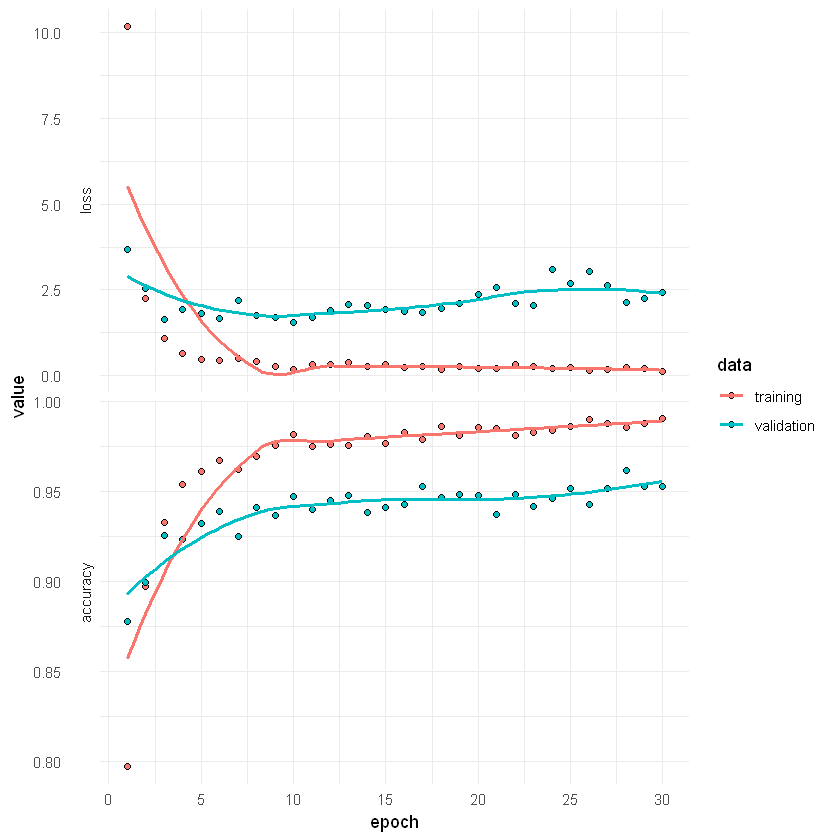

In [36]:
plot(MLP.history) + theme_minimal()

### different epoch

In [10]:
MLP.history = model_fashion %>% fit(x_test, y_test, epochs = 70, validation_split = 0.2,
batch_size = 32)

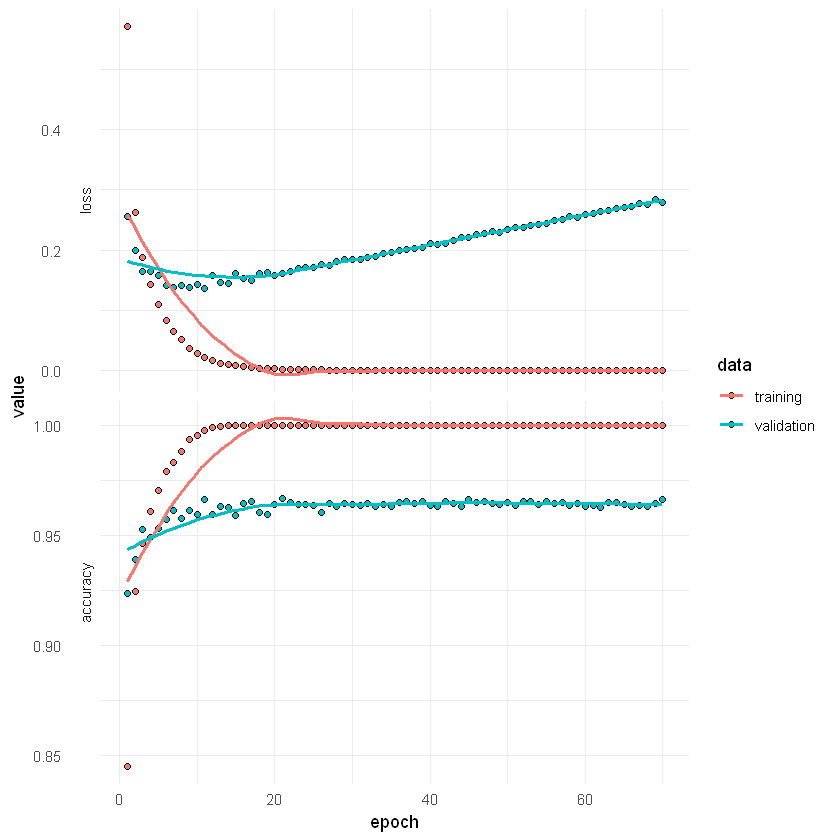

In [11]:
plot(MLP.history) + theme_minimal()

In [12]:
score <- model_fashion %>% evaluate(x_train, y_train)
cat('Test accuracy:', score$acc, "\n")

Test accuracy: 0.9501 


In [9]:
MLP.history = model_fashion %>% fit(x_test, y_test, epochs = 100, validation_split = 0.2,
batch_size = 32)

In [10]:
score <- model_fashion %>% evaluate(x_train, y_train)
cat('Test accuracy:', score$acc, "\n")

Test accuracy: 0.9515667 


### Evaluate Accuracy

In [9]:
score <- model_fashion %>% evaluate(x_train, y_train)
cat('Test loss:', score$loss, "\n")

Test loss: 0.24346 


In [10]:
cat('Test accuracy:', score$acc, "\n")

Test accuracy: 0.9510834 


### Build CNN model

In [7]:
model_fashion.cnn <- keras_model_sequential()
#configuring the Model
model_fashion.cnn %>%

#defining a 2-D convolution layer
layer_conv_2d(filter=32,kernel_size=c(3,3),padding="same",input_shape=c(28,28, 1) ) %>% layer_activation("relu") %>%
layer_max_pooling_2d(pool_size=c(2,2)) %>%
#another 2-D convolution layer
layer_conv_2d(filter=32 ,kernel_size=c(3,3)) %>% layer_activation("relu") %>%
#Defining a Pooling layer which reduces the dimentions of the #features map and reduces the computati
#onal complexity of the model
layer_max_pooling_2d(pool_size=c(2,2)) %>%
#dropout layer to avoid overfitting
layer_dropout(0.25) %>%
#flatten the input
layer_flatten() %>%
layer_dense(64) %>%
layer_activation("relu") %>%
layer_dropout(0.5) %>%
#output layer-10 classes-10 units
layer_dense(10) %>%
#applying softmax nonlinear activation function to the output layer #to calculate cross-entropy
layer_activation("softmax")

In [6]:
x_train.cnn = array(x_test, dim = c(dim(x_test)[1], dim(x_test)[2], dim(x_test)[3], 1))
x_test.cnn = array(x_train, dim = c(dim(x_train)[1], dim(x_train)[2], dim(x_train)[3], 1))

In [9]:
model_fashion.cnn %>% compile(
optimizer = 'adam',
loss = 'sparse_categorical_crossentropy',
metrics = c('accuracy')
)
CNN.history = model_fashion.cnn %>% fit(x_train.cnn, y_test, epochs = 30, validation_split
= 0.2, batch_size = 32)

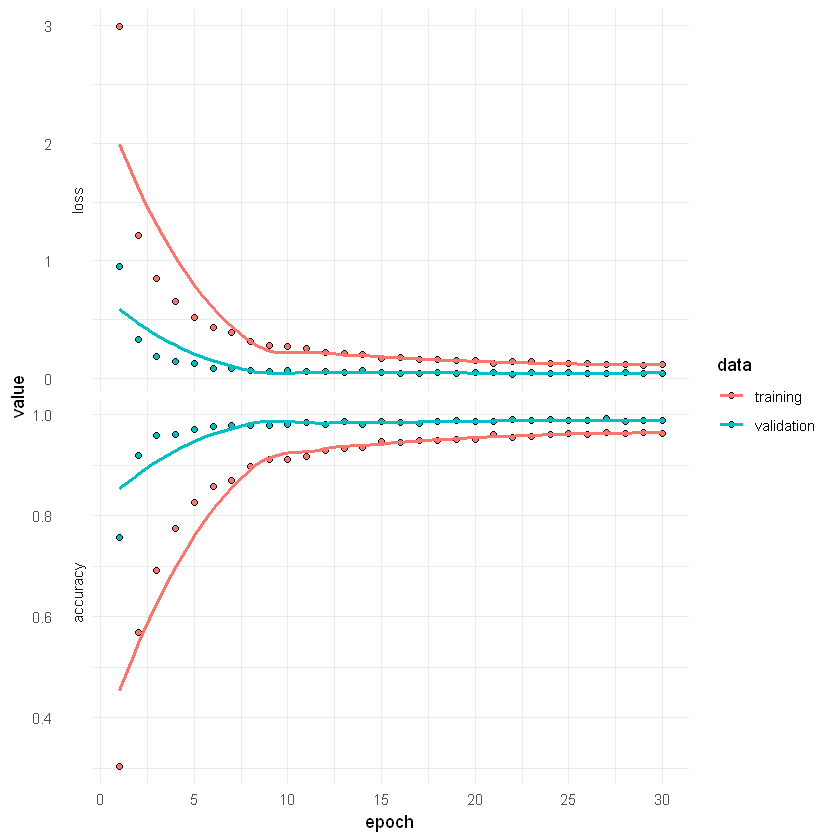

In [44]:
plot(CNN.history) + theme_minimal()

In [45]:
score <- model_fashion.cnn %>% evaluate(x_test.cnn, y_train)
cat('Test loss:', score$loss, "\n")

Test loss: 0.1055193 


In [46]:
cat('Test accuracy:', score$acc, "\n")

Test accuracy: 0.9762833 


### CNN_new_round

In [7]:
model_fashion.cnn %>% compile(
optimizer = 'adam',
loss = 'sparse_categorical_crossentropy',
metrics = c('accuracy')
)

In [ ]:
CNN.history = model_fashion.cnn %>% fit(x_train.cnn, y_test, epochs = 100, validation_split
= 0.2, batch_size = 32)

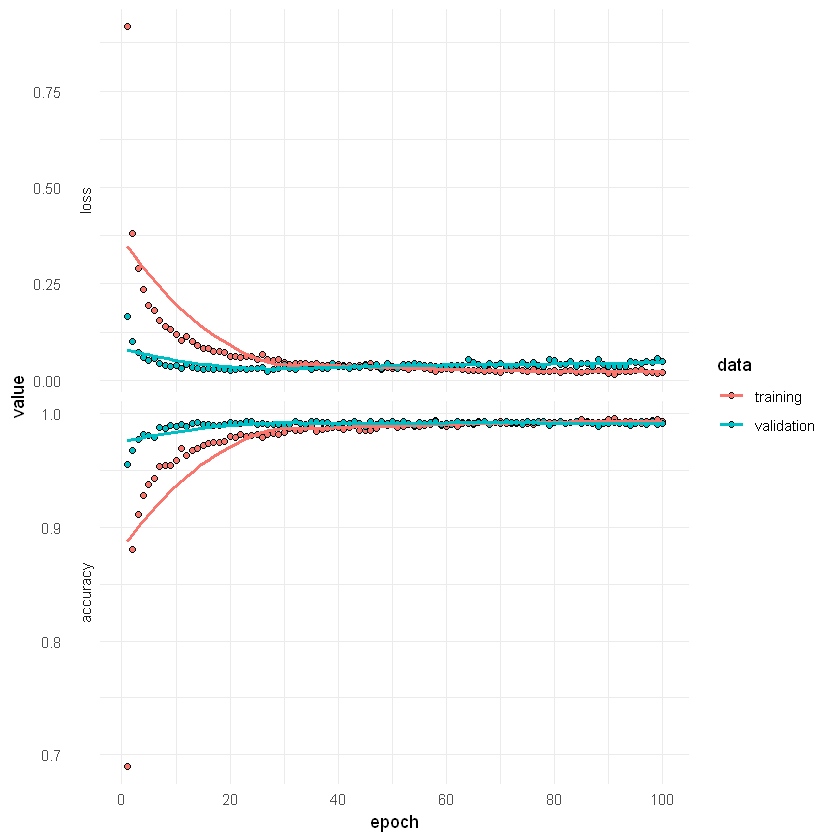

In [9]:
plot(CNN.history) + theme_minimal()

In [10]:
score <- model_fashion.cnn %>% evaluate(x_test.cnn, y_train)
cat('Test accuracy:', score$acc, "\n")

Test accuracy: 0.9840333 


In [10]:
CNN.history = model_fashion.cnn %>% fit(x_train.cnn, y_test, epochs = 70, validation_split
= 0.2, batch_size = 32)

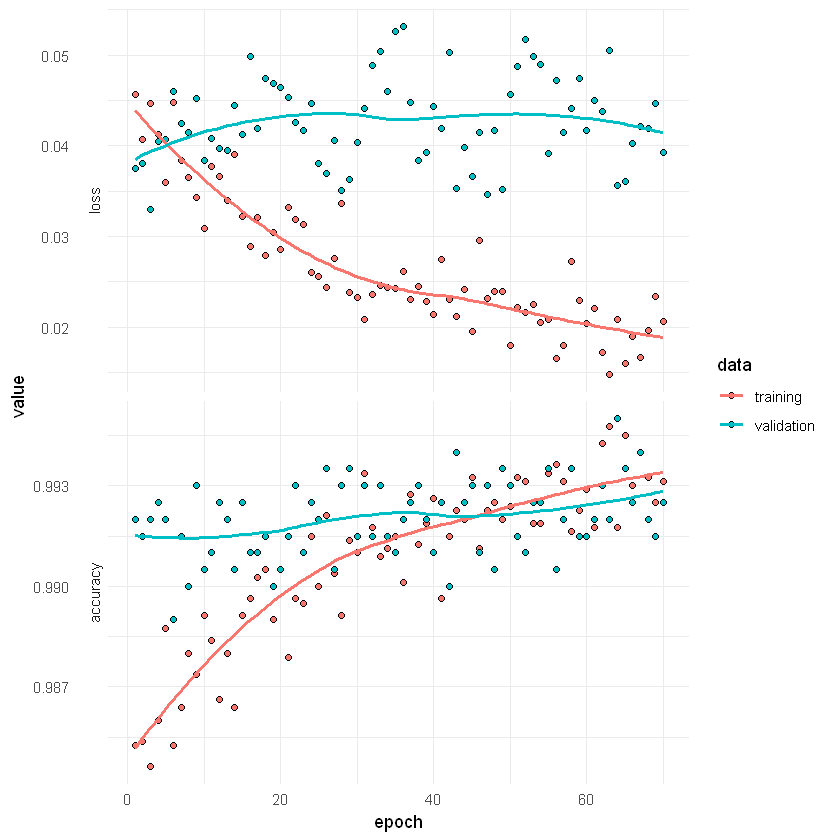

In [11]:
plot(CNN.history) + theme_minimal()

In [12]:
score <- model_fashion.cnn %>% evaluate(x_test.cnn, y_train)
cat('Test accuracy:', score$acc, "\n")

Test accuracy: 0.98425 
